In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl

ModuleNotFoundError: No module named 'networkx'

# LAB 1

## Creation of the graph (without occupancy)

In [ ]:
nodes = pd.read_csv('Documentation/nodes.csv', header=None, index_col=0, names=["Node","x_position","y_position"])
edges = pd.read_csv('Documentation/links.csv', header=None, names=[
    "Link ID", 
    "Length (m)",
    "Number of lanes", 
    "Starting node ID",
    "Ending node ID", 
    "Region"], index_col=0)
print(nodes.head(5),"\n", edges.head(5))



NameError: name 'pd' is not defined

In [ ]:
G = nx.from_pandas_edgelist(edges, 
                            source = "Starting node ID", 
                            target= "Ending node ID", 
                            edge_attr=["Length (m)", "Number of lanes", "Region"],
                            create_using=nx.MultiDiGraph)
plt.figure(figsize=(20,20))
nx.draw(G, node_size = 2, pos=nodes.transpose())
#cest quoi se transpose
plt.show()

NameError: name 'nx' is not defined

In [ ]:
edges_region = edges.loc[edges['Region'] == 4]
#J'essaie de créer une image qui montre par couleur chaque region MAIS CA MARCHE PAS 


color_list=[]
for i in range(edges['Region'].size):

    if edges.iloc[i].at["Region"] == 1:
        color_list.append("red")
    if edges.iloc[i].at["Region"] == 2:
        color_list.append("blue")
    if edges.iloc[i].at["Region"] == 3:
        color_list.append("green")
    if edges.iloc[i].at["Region"] == 4:
        color_list.append("yellow")
print(color_list)

G = nx.from_pandas_edgelist(edges, 
                            source = "Starting node ID", 
                            target= "Ending node ID", 
                            edge_attr=["Length (m)", "Number of lanes", "Region"],
                            create_using=nx.MultiDiGraph)

    

plt.figure(figsize=(20,20))
nx.draw(G, node_size = 2, pos=nodes.transpose(), edge_color=color_list)

plt.show()

NameError: name 'edges' is not defined

## Adding occupancy

In [ ]:
occupancy = pd.read_csv('Documentation/occupancy.csv', index_col = 0)



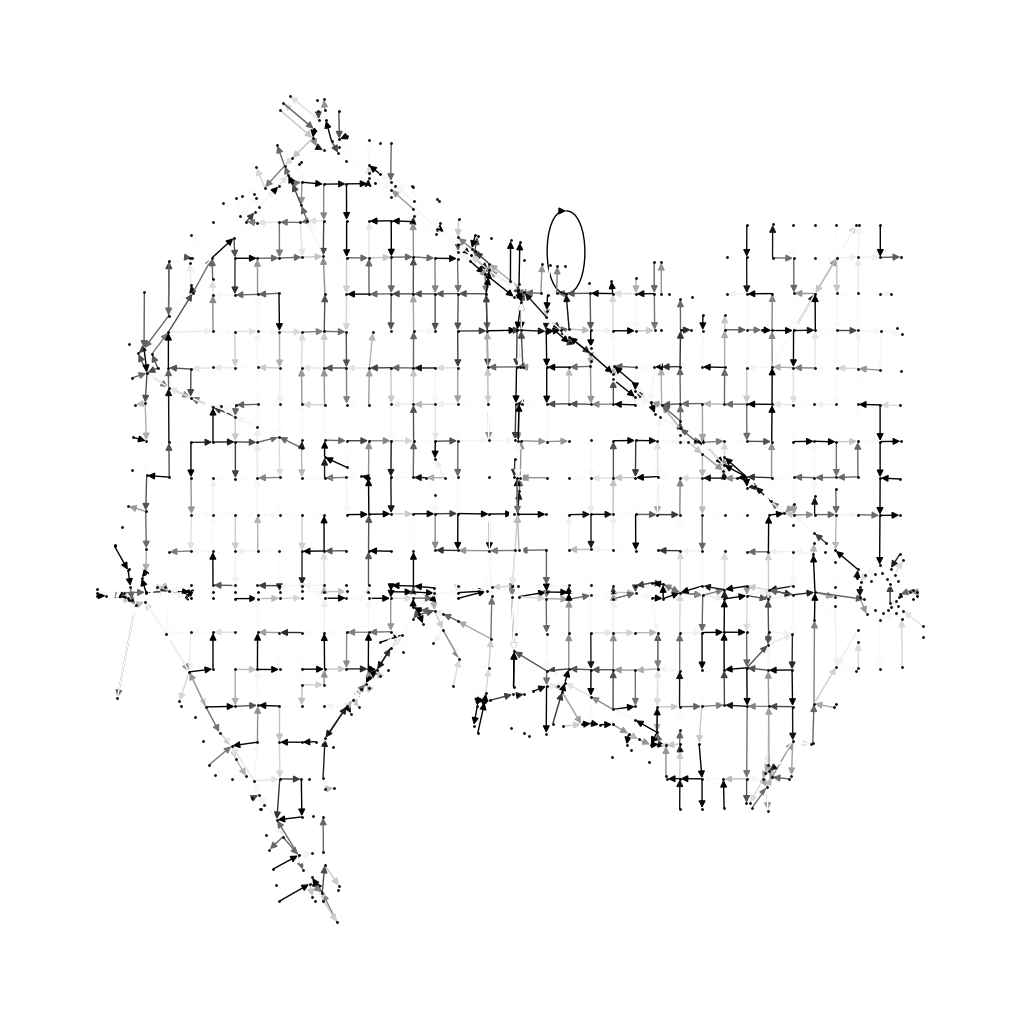

In [ ]:
time_in_minutes = 120
time = time_in_minutes * 60
occupancy_at_t = occupancy.loc[time]
occupancy_at_t.name = f"Occupancy at time {time}"

plt.figure(figsize=(10,10))
nx.draw(G, node_size = 1, node_color="k", pos=nodes.transpose(), edge_cmap=mpl.colormaps["Greys"], edge_color=occupancy_at_t)
plt.show()

## Brol

In [ ]:
H = nx.Graph()


In [ ]:
a = np.array(G.nodes)

a.sort()

In [ ]:
nodes.transpose().to_dict()

{1: {'x_position': 429948, 'y_position': 4581385},
 2: {'x_position': 431582, 'y_position': 4580937},
 3: {'x_position': 432524, 'y_position': 4583069},
 4: {'x_position': 432650, 'y_position': 4582536},
 5: {'x_position': 432645, 'y_position': 4582410},
 6: {'x_position': 428085, 'y_position': 4582825},
 7: {'x_position': 429247, 'y_position': 4580521},
 8: {'x_position': 431601, 'y_position': 4582951},
 9: {'x_position': 431314, 'y_position': 4580934},
 10: {'x_position': 430096, 'y_position': 4581212},
 11: {'x_position': 432591, 'y_position': 4582817},
 12: {'x_position': 430549, 'y_position': 4581247},
 13: {'x_position': 430613, 'y_position': 4581238},
 14: {'x_position': 429117, 'y_position': 4580599},
 15: {'x_position': 432747, 'y_position': 4581728},
 16: {'x_position': 428923, 'y_position': 4583515},
 17: {'x_position': 431231, 'y_position': 4581054},
 18: {'x_position': 429253, 'y_position': 4580639},
 19: {'x_position': 431752, 'y_position': 4580940},
 20: {'x_position': 4

In [ ]:
len(G.edges)

1570

In [ ]:
print(occupancy)

           512        513        514         516        593       594  595  \
0                                                                            
90    0.000000   0.318851   0.000000    4.498925   0.000000  2.558253    0   
180   0.000000   0.954632   0.689668    2.758188   0.000000  3.160290    0   
270   1.467929   2.044361   1.777651    2.653984   2.062903  3.084929    0   
360   3.901444   2.449490   3.395587    2.203485   5.054119  3.337283    0   
450   3.104570   1.904677   6.112496    5.337937   6.093624  2.410011    0   
...        ...        ...        ...         ...        ...       ...  ...   
6840  1.434303   8.809766  37.979273   95.631610  11.037785  5.581527    0   
6930  1.893379   6.196733  65.186992  100.000000   9.942805  6.036213    0   
7020  0.883639   4.366954  76.895563   99.889194   9.251026  5.806009    0   
7110  1.118334  42.137753  61.496904   83.768938  11.439867  5.269974    0   
7200  2.591139  66.666667  99.505577   94.755297   9.022585  3.7

In [ ]:
## Point 2

0
90         0.0
180      120.0
270      320.0
360      560.0
450      800.0
         ...  
6840    2400.0
6930    1560.0
7020      80.0
7110     480.0
7200     200.0
Name: 514, Length: 80, dtype: float64
(80, 1570)
(80,)


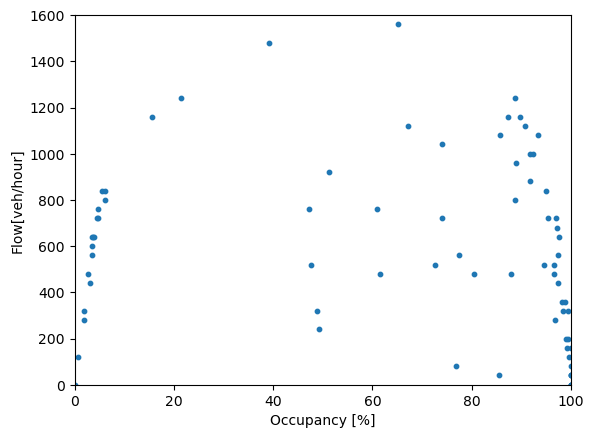

In [ ]:
flow = pd.read_csv('Documentation/flow.csv', index_col = 0)

number_link = 514

flow_l = flow.loc[:, f'{number_link}']*3600/90
occpuancy_single_road = occupancy.loc[:, f'{number_link}']
print(flow_l)
print(flow.shape)
print(occpuancy_single_road.shape)

plt.scatter(occpuancy_single_road, flow_l, s=10)
plt.xlabel("Occupancy [%]")
plt.ylabel("Flow[veh/hour]")
plt.xlim(0, 100)
plt.ylim(0,1600)
plt.show()



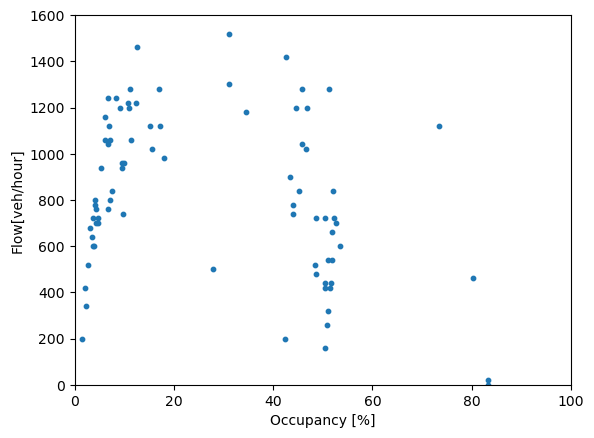

In [ ]:
number_link = [516, 512]

        
flow_l= flow[[f'{number_link[0]}', f'{number_link[1]}']]

flow_mean = flow_l.mean(axis=1)*3600/90

occupancy_l = occupancy[[f'{number_link[0]}', f'{number_link[1]}']]
occupancy_mean = occupancy_l.mean(axis=1)

plt.scatter(occupancy_mean, flow_mean, s=10)   
plt.xlabel("Occupancy [%]")
plt.ylabel("Flow[veh/hour]") 
plt.xlim(0, 100)
plt.ylim(0,1600)
plt.show()


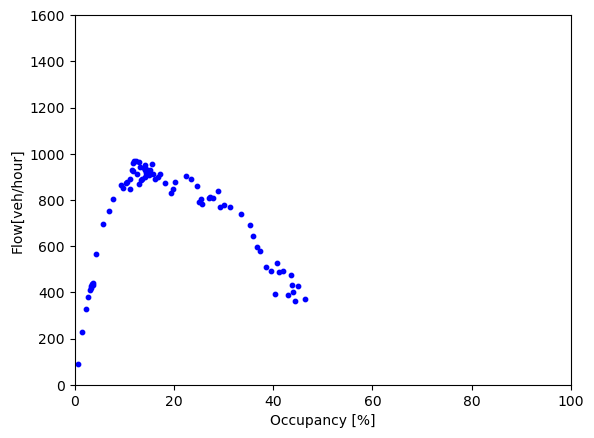

In [ ]:
region = 1

number_link = []

for index in edges.index:
    if edges.loc[index]["Region"] == region:
        number_link.append(str(index))
       
flow_l= flow[number_link]
flow_mean = flow_l.mean(axis=1)*3600/90

occupancy_l = occupancy[number_link]
occupancy_mean = occupancy_l.mean(axis=1)

plt.scatter(occupancy_mean, flow_mean, s=10, c="Blue")   
plt.xlabel("Occupancy [%]")
plt.ylabel("Flow[veh/hour]")
plt.xlim(0, 100)
plt.ylim(0,1600)
plt.show()

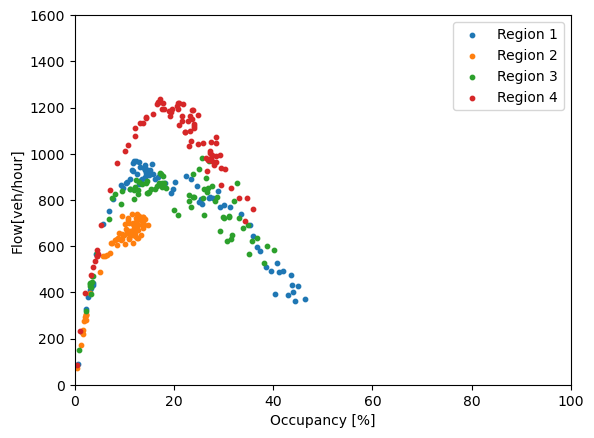

In [ ]:
Region = [1,2,3,4]

for region in Region:

    number_link = []

    for index in edges.index:
        if edges.loc[index]["Region"] == region:
            number_link.append(str(index))
        
    flow_l= flow[number_link]
    flow_mean = flow_l.mean(axis=1)*3600/90

    occupancy_l = occupancy[number_link]
    occupancy_mean = occupancy_l.mean(axis=1)

    plt.scatter(occupancy_mean, flow_mean, label=f'Region {region}', s= 10)   
    plt.xlabel("Occupancy [%]")
    plt.ylabel("Flow[veh/hour]")
    plt.xlim(0, 100)
    plt.ylim(0,1600)

plt.legend()
plt.show()